<a href="https://colab.research.google.com/github/girlstalkmath-umd/patterns-and-fractals/blob/master/Julia_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Julia Set

If we iterate a function, $f(z)$ from some starting point, $z_0$ one of the following must happen:

* the orbit initializing at $z_0$ diverges (goes towards infinity), or
* the orbit initializing at $z_0$ stays bounded under iteration.

We will define the Filled Julia set as the set of initial complex numbers whose orbits stay bounded under iteration and the Julia set is the set is the boundary of the filled Julia set. 

The simplest Julia set is if we choose $c=0$ and iterate the function, 
$$f(z) = z^2$$ 
and the filled Julia set is the unit disk (so all complex numbers whose norm is less than or equal to 1) and the Julia set is the unit circle (the set of all complex numbers with norm equal to 1). The interior of this unit circle has iterations that approach 0 whereas the exterior has iterations that diverge to $\infty$.

**There are infinitly values of $c$ to choose so there are infinitely many families of Julia sets.**

A property of the family $f(z) = z^2+c$ is that if $|z|\geq|c|$ and $|z| > 2$ then the orbit of $z$ will diverge (derivation omitted). We can use this for an algorithm to plot the Julia set. Limit the range of initial conditions $z_0$ we iterate.  We choose a rectangular grid of complex numbers to be our initial coniditions. Then iterate from each until either 
* the absolute value of the iterate gets bigger than the max of 2 and $|c|$. The starting point is then colored on a scale based on the number of iterates it took to reach that point (darker for more iterates), or
* we reach some specified stopping number and color the point black.

Let us try to write the code to find the Julia Set of $z^2+c$ one step at a time.

First, we will import some python libraries that we expect we will need. Go ahead and google "numpy" and "matplotlib" and try to figure out what these libraries do.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Now let us define the size of the domain (i.e. the rectangular grid)  over which we want to find the Julia Set using two parameters, im_width and im_height (the width and the height of the rectangular domain for our Julia Set).

In [0]:
# Image width and height; parameters for the plot
im_width, im_height = 1000, 1000

The parameter $c$ for the Julia set. Set the parameter $c$ to the complex number $c = -0.1 + 0.65i$

In [0]:
c = complex(-0.1,0.65) # set the value of c

Some more parameters that you should try to understand using the comments:

In [0]:
#Keep this slightly larger than |c| and 2 
nit_max = 1000 # maximum number of iterations
boundary = max(abs(c),2) #the domain but focus on |c|≥|𝑧| or 2>|𝑧| (which ever is larger), 
# if z crosses boundary, we call this the bailout condition and color the point black.
xmin, xmax = -boundary, boundary # x limits of our domain in the complex plane, you can change the domain but focus on |c|≥|𝑧| and |𝑧|>2 
xwidth = xmax - xmin # width of our domain in the complex plane
ymin, ymax = -boundary, boundary # y limits of our domain in the complex plane
yheight = ymax - ymin # height of our domain in the complex plane

### Important: In the next block of code, you should add the function $z = z^2+c$ to iterate the numbers. Do this, then run the plotting cell below to view your Julia set.

In [0]:
julia = np.zeros((im_width, im_height))

for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations, does it diverge?
        while abs(z) <= boundary and nit < nit_max:
            # do the iteration (z = z**2 + c)
            z = z**2 + c
            nit += 1
        ratio = nit / nit_max
        julia[ix,iy] = ratio

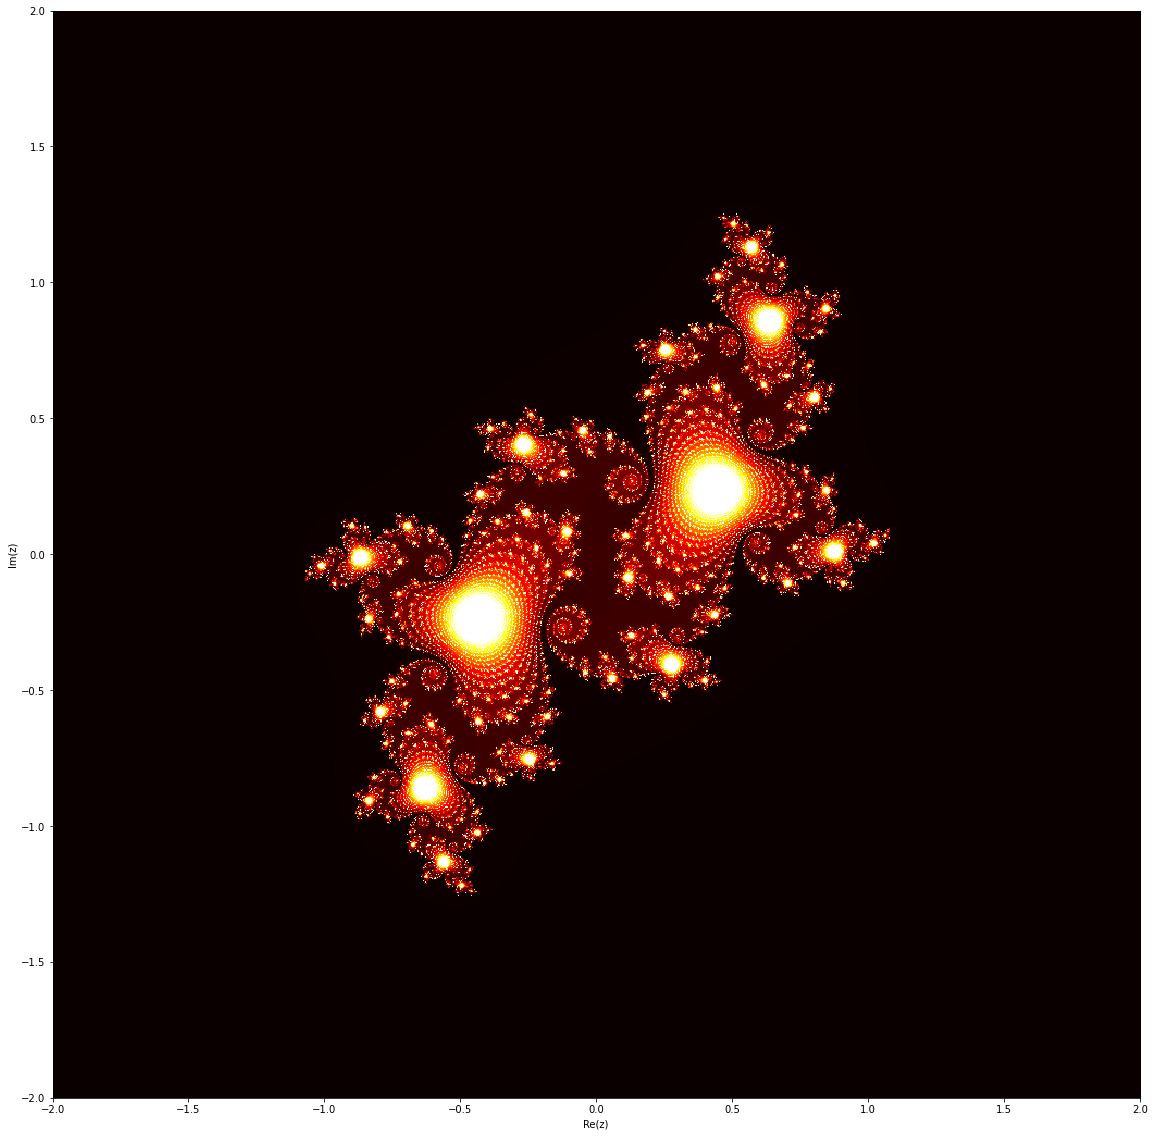

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(julia, interpolation='nearest', cmap=cm.hot, extent = [xmin , xmax, ymin , ymax])
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
# Set the tick labels to the coordinates of z0 in the complex plane
plt.show()

We can check out a specific initial condition and how it iterates until it is categorized and colored. In the code below, change the initial value, the number of iterates (try 500, too), and the time.sleep value (to control the animation pause). If we pick a value that is close to 0, is it true that it will stay bounded until the dropout? See if you can find points by looking at the fractal pattern produced above and predict their behavoir before testing it. It will be most challenging to predict the behavior of a point on the Julia set (the boundary) rather than the fill portion. Why is this?

KeyboardInterrupt: ignored

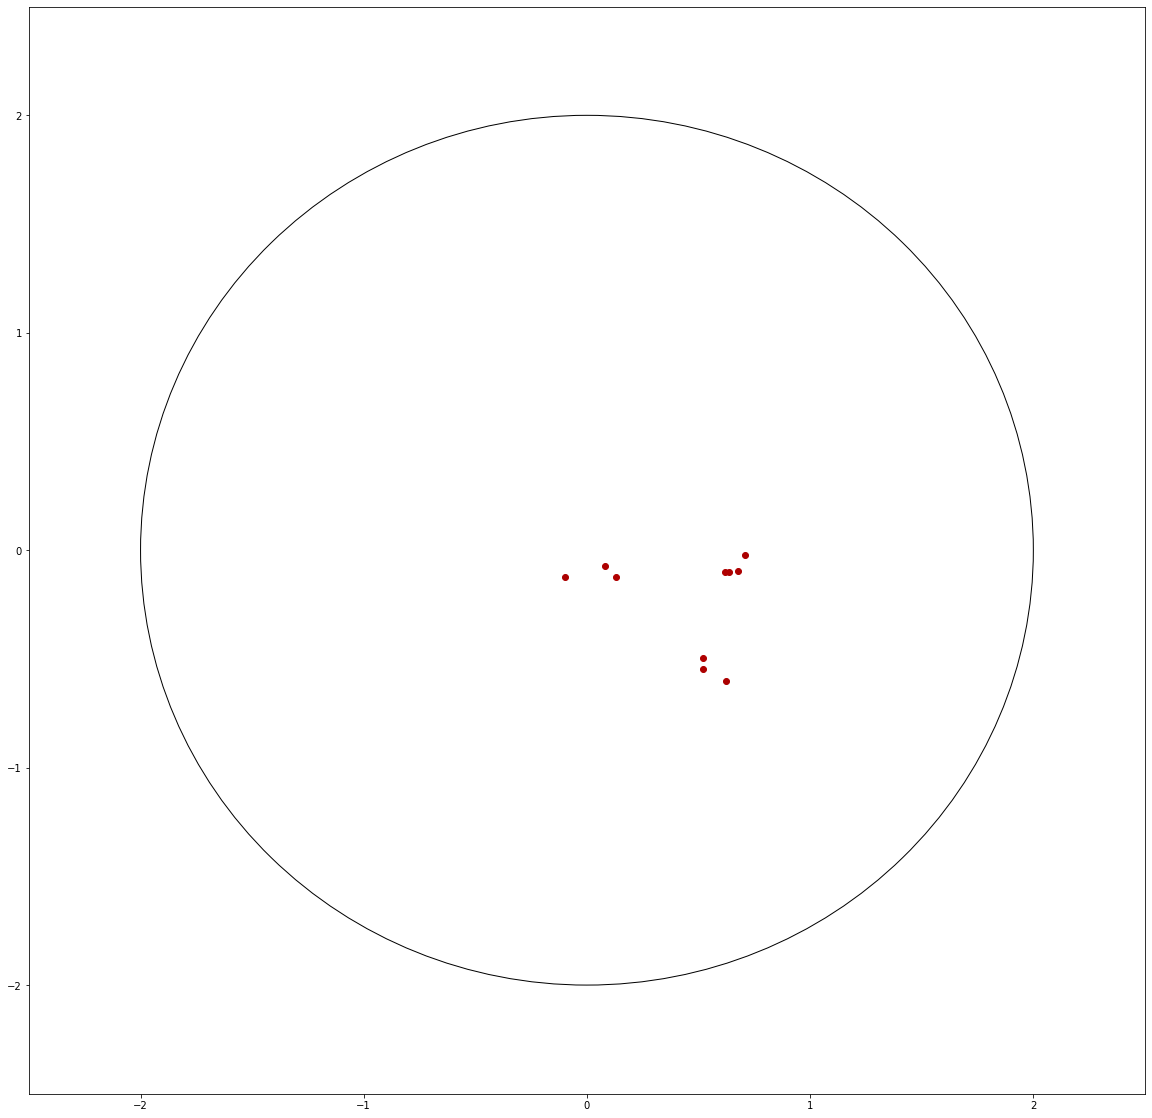

In [8]:
import time
import pylab as pl
from IPython import display

nit_max = 1000
z = complex(0.3,0.1) #change initial condition here
boundary = max(abs(c),2)
boundary_circle = plt.Circle((0, 0), boundary, color='k', fill=False)

ax = plt.gca()
ax.set_xlim((-2.5, 2.5))
ax.set_ylim((-2.5, 2.5))
ax.add_artist(boundary_circle)

# Do the iterations, does it diverge?
while abs(z) <= boundary and nit < nit_max:
  # do the iteration (z = z**2 + c)
    z = z**2 + c
    nit += 1
    ratio = nit / nit_max
    color_pt = pl.cm.hot(ratio)
    ax.plot(z.imag,z.real,'o', color=color_pt)
    display.clear_output(wait=True)
    display.display(pl.gcf()) 
    time.sleep(1) #adjust how fast it animates, 
    #you can comment this out too by placing a '#' in front, though the plot can only update so fast 


As a bonus, fun exercise, generate the Julia set for the following values of $c$

* 0.79 + 1.5i
* 0.162 + 1.04i
* 0.3 - 0.01i
* -1.476 + 0i
* -0.12 - 0.77i
* 0.28 + 0.008i
* −0.8i
* 0 (The unit circle)
* -2 (Fatou domain)

To make this easier, let us define a function JuliaSet which takes in $c$ as an input and plots the Julia Set for that value of $c$

In [0]:
def JuliaSet(c):
    
    im_width, im_height = 2000, 2000
    boundary = 10 #max(abs(c),2) #the domain but focus on |c|≥|𝑧| or 2>|𝑧| (which ever is larger), 
    # if z crosses boundary, we call this the bailout condition and color the point black.
    # this isn't a strict boundary, you could change this values to 10 and you'd get the same answer. 
    nit_max = 1000 # maximum number of iterations
    xmin, xmax = -boundary, boundary # x limits of our domain in the complex plane
    xwidth = xmax - xmin # width of our domain in the complex plane
    ymin, ymax = -boundary, boundary # y limits of our domain in the complex plane
    yheight = ymax - ymin # height of our domain in the complex plane


    julia = np.zeros((im_width, im_height))

    for ix in range(im_width):
        for iy in range(im_height):
            nit = 0
            # Map pixel position to a point in the complex plane
            z = complex(ix / im_width * xwidth + xmin,
                        iy / im_height * yheight + ymin)
            # Do the iterations
            while abs(z) <= boundary and nit < nit_max:
                z = z**2 + c
                nit += 1
            ratio = nit / nit_max
            julia[ix,iy] = ratio
    
    return(julia)

In [0]:
julia = JuliaSet(complex(0.28, 0.008))

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
plt.show()